# Clustering within the home-loans categories 

In [1]:
# Load all necessary packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import re

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



plt.style.use('bmh')
%matplotlib inline

In [2]:
job_data=pd.read_csv('text3_clean.csv',index_col=0)

In [3]:
job_data.columns

Index(['cleaned_article', 'category_type', 'article_title',
       'cleaned_article3'],
      dtype='object')

In [4]:
cat_art=job_data[['cleaned_article3','category_type','cleaned_article','article_title']]

In [5]:
home_art=cat_art[cat_art.category_type=='home-loans']

## LDA setting up

I will start with LDA to see if I can get some good clusters

In [6]:
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [7]:
tfidf=TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features=tfidf.fit_transform(home_art.cleaned_article3)

In [8]:
lda_tfidf = LatentDirichletAllocation(n_topics=4, random_state=0)
lda_tfidf.fit(features)

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=4, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [9]:
pyLDAvis.sklearn.prepare(lda_tfidf,features,tfidf)

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.027336 -0.000006       1        1  91.579121
0      0.009554 -0.000631       2        1   3.687621
2      0.009202  0.000659       3        1   2.855503
1      0.008581 -0.000022       4        1   1.877754, topic_info=       Category       Freq                   Term      Total  loglift  logprob
term                                                                          
69934   Default  29.000000                   loan  29.000000  30.0000  30.0000
54878   Default  27.000000                   home  27.000000  29.0000  29.0000
102628  Default  25.000000                   rate  25.000000  28.0000  28.0000
115621  Default   0.000000           satisfaction   0.000000  27.0000  27.0000
55271   Default  15.000000              home loan  15.000000  26.0000  26.0000
51075   Default   0.000000                  green   0.000000  25.0000  25.0000
54497   Default   1.000000                 hobart   1.000000  24.0000  24.0000
68068   Default   0.000000         life insurance   0.000000  23.0000  23.0000
31603   Default   0.000000                  dawes   0.000000  22.0000  22.0000
111565  Default   0.000000                 resale   0.000000  21.0000  21.0000
47622   Default   0.000000                foreign   0.000000  20.0000  20.0000
55714   Default   0.000000            home owners   0.000000  19.0000  19.0000
90166   Default   0.000000                 owners   0.000000  18.0000  18.0000
140584  Default   0.000000      windowdatawrapper   0.000000  17.0000  17.0000
79145   Default   0.000000                  metro   0.000000  16.0000  16.0000
21312   Default   0.000000           changeannual   0.000000  15.0000  15.0000
21995   Default   0.000000              checklist   0.000000  14.0000  14.0000
54821   Default   0.000000           holiday home   0.000000  13.0000  13.0000
8999    Default   0.000000     australia property   0.000000  12.0000  12.0000
50446   Default   0.000000       government boost   0.000000  11.0000  11.0000
93591   Default   0.000000            performance   0.000000  10.0000  10.0000
95531   Default   0.000000                 points   0.000000   9.0000   9.0000
7508    Default   0.000000                   asic   0.000000   8.0000   8.0000
90911   Default   0.000000                   park   0.000000   7.0000   7.0000
30552   Default   0.000000  customer satisfaction   0.000000   6.0000   6.0000
20208   Default   0.000000          cent december   0.000000   5.0000   5.0000
2350    Default   1.000000               adelaide   1.000000   4.0000   4.0000
20266   Default   0.000000             cent house   0.000000   3.0000   3.0000
121654  Default   0.000000                  slump   0.000000   2.0000   2.0000
81764   Default  12.000000               mortgage  12.000000   1.0000   1.0000
...         ...        ...                    ...        ...      ...      ...
117274   Topic4   0.006457            scamnet say   0.108951   1.1494 -11.0601
74415    Topic4   0.006549             lossmaking   0.127133   1.0092 -11.0460
143261   Topic4   0.005568                   youi   0.108931   1.0014 -11.2083
100594   Topic4   0.005553     prospective tenant   0.109384   0.9946 -11.2110
20375    Topic4   0.005669            cent profit   0.117973   0.9397 -11.1902
74416    Topic4   0.005669      lossmaking resale   0.117973   0.9397 -11.1902
99519    Topic4   0.005195           property ask   0.108206   0.9387 -11.2777
139717   Topic4   0.005195       websites scammer   0.108206   0.9387 -11.2777
23240    Topic4   0.006825             click link   0.154685   0.8542 -11.0048
26433    Topic4   0.006825   consequence consumer   0.154685   0.8542 -11.0048
69135    Topic4   0.006825             link andor   0.154685   0.8542 -11.0048
5141     Topic4   0.006825      andor consequence   0.154685   0.8542 -11.0048
109063   Topic4   0.006825     remuneration click   0.154685   0.8542 -11.0048

In [1]:
# Trying again using a custom stopwords list, this step was repeated and updated to get better distinction

new_stop=stopwords.words('english')

titles_words=['car','loans','bank','accounts','home','look','take'
              'savings','loan','deposit','table','display','saving','account','personal','ratecity','thelatest',
             'follow','get','news', 'article','Australians','Australia','Aussies','card','per','cent','percent'
             ,'month','may','could','year','pay','australia','australian','windowdatawrapper','adata', 'many',
              'datawrapperheight','rate','mortgage', 'lender','make','ceo','ratecitycomau','comparison', 'website',
              
              'loansonline','mortgagerepayments','mortgagesk','ournews','articlesto',
              'getelementbyid','floor','window','iframe','offsetwidth','datawrapper','height'
 

             'undefined','typeof','px','embeddeltas','mathmax','iframestyleheightwindowdatawrapper','iframeoffsetwidth', 'mathmin',
                 'say','mr','ratecomparison', 'ratechange','loaninterest', 'ratecomparison','rateaggregate','also','melbourne','perth'
                ,'australians','aussies','brisbane','sydney','hobart','darwin','canberra','regional','adelaide']
new_stop.extend(titles_words)

NameError: name 'stopwords' is not defined

In [149]:
tfidf2=TfidfVectorizer(stop_words=new_stop,ngram_range=(1,2))
features2=tfidf2.fit_transform(home_art.cleaned_article3)

In [150]:
lda_tfidf2 = LatentDirichletAllocation(n_topics=6, random_state=42)
lda_tfidf2.fit(features2)

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=6, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [151]:
pyLDAvis.sklearn.prepare(lda_tfidf2,features2,tfidf2)

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.020278 -0.001119       1        1  41.234815
0     -0.002434  0.007415       2        1  19.525256
4     -0.001219 -0.005137       3        1  16.860178
1      0.004261  0.000138       4        1  10.495132
2      0.008892 -0.001324       5        1   8.294047
3      0.010778  0.000026       6        1   3.590572, topic_info=       Category      Freq                Term     Total  loglift  logprob
term                                                                     
46539   Default  5.000000                 fee  5.000000  30.0000  30.0000
102940  Default  7.000000            property  7.000000  29.0000  29.0000
30233   Default  3.000000              credit  3.000000  28.0000  28.0000
65838   Default  7.000000            interest  7.000000  27.0000  27.0000
60698   Default  3.000000             housing  3.000000  26.0000  26.0000
94622   Default  1.000000             package  1.000000  25.0000  25.0000
56161   Default  1.000000           guarantor  1.000000  24.0000  24.0000
17932   Default  3.000000                 buy  3.000000  23.0000  23.0000
130363  Default  1.000000              suburb  1.000000  22.0000  22.0000
57927   Default  0.000000                 hia  0.000000  21.0000  21.0000
81642   Default  1.000000              median  1.000000  20.0000  20.0000
41545   Default  1.000000              equity  1.000000  19.0000  19.0000
118620  Default  4.000000                save  4.000000  18.0000  18.0000
112460  Default  4.000000           repayment  4.000000  17.0000  17.0000
49686   Default  3.000000                 fix  3.000000  16.0000  16.0000
143222  Default  3.000000            variable  3.000000  15.0000  15.0000
90105   Default  3.000000               offer  3.000000  14.0000  14.0000
78748   Default  1.000000                 lvr  1.000000  13.0000  13.0000
15568   Default  3.000000            borrower  3.000000  12.0000  12.0000
67519   Default  3.000000          investment  3.000000  11.0000  11.0000
118548  Default  0.000000        satisfaction  0.000000  10.0000  10.0000
99329   Default  0.000000          population  0.000000   9.0000   9.0000
118250  Default  1.000000                sale  1.000000   8.0000   8.0000
38650   Default  0.000000         dwell value  0.000000   7.0000   7.0000
119959  Default  0.000000              season  0.000000   6.0000   6.0000
109943  Default  2.000000           refinance  2.000000   5.0000   5.0000
38637   Default  0.000000               dwell  0.000000   4.0000   4.0000
55718   Default  2.000000              growth  2.000000   3.0000   3.0000
28785   Default  3.000000                cost  3.000000   2.0000   2.0000
67885   Default  2.000000            investor  2.000000   1.0000   1.0000
...         ...       ...                 ...       ...      ...      ...
25463    Topic6  0.013191  compare advertised  0.128777   1.0483 -10.9850
28988    Topic6  0.013191        cost indepth  0.128777   1.0483 -10.9850
63900    Topic6  0.013191         indepth way  0.128777   1.0483 -10.9850
66297    Topic6  0.013191   interest majority  0.128777   1.0483 -10.9850
37270    Topic6  0.013065         dollar good  0.128478   1.0411 -10.9945
132523   Topic6  0.012916          take basis  0.128123   1.0323 -11.0060
12683    Topic6  0.012916      basis interest  0.128123   1.0323 -11.0060
84869    Topic6  0.012916      mortgageis one  0.128123   1.0323 -11.0060
124162   Topic6  0.012813        single first  0.128103   1.0245 -11.0140
130225   Topic6  0.012788     subject finance  0.128205   1.0217 -11.0160
41553    Topic6  0.014667        equity allow  0.147137   1.0211 -10.8789
89870    Topic6  0.012846        occupier max  0.129271   1.0180 -11.0114
81068    Topic6  0.012846             max lvr  0.129271   1.0180 -11.0114
141676   Topic6  0.012707               uppay  0.127976   1.0171 -11.0224
126563   Topic6  0.012707         spare money  

In [152]:
# In both stages the LDA clustering hasn't helped. In the second stage although the clusters are better, the words dont make sense. 
# I will try other methods to see if I can achieve some level of distinction


# References for LDA
# http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb
# http://brandonrose.org/clustering

## Cluster by K-Means

In [153]:
from sklearn.cluster import KMeans

In [154]:
loan_cluster = Pipeline([('tfidf3', TfidfVectorizer(stop_words=new_stop,ngram_range=(1,2))),
                     ('k_clus', KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=1,random_state=46))])



loan_cluster.fit(home_art.cleaned_article3)

Pipeline(memory=None,
     steps=[('tfidf3', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True...5, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=46, tol=0.0001, verbose=0))])

In [156]:
import string
strip_words=text.translate(text.maketrans('', '', string.digits))

text=re.sub(r'[^\w\s]','', strip_words)

In [157]:
loan_features=loan_cluster.named_steps['tfidf3']
loan_model=loan_cluster.named_steps['k_clus']

In [158]:
order_centroids = loan_model.cluster_centers_.argsort()[:, ::-1]
terms = loan_features.get_feature_names()

In [159]:
tfidf3=TfidfVectorizer(stop_words=new_stop,ngram_range=(1,2))
features3=tfidf3.fit_transform(home_art.cleaned_article3)

In [160]:
# Looking at the top words from each clusters
for i in range(5):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :20]:
        print('%s' % terms[ind])
    print('*#'*86)

Cluster 0:
buyer
housing
first
first buyer
value
property
growth
market
increase
price
new
report
state
government
dwell
house
building
grant
number
affordability
*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#
Cluster 1:
property
price
rent
buy
house
market
investment
value
rental
purchase
capital
sell
city
time
buyer
need
investor
new
credit
equity
*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#
Cluster 2:
interest
repayment
credit
debt
save
offset
fee
financial
money
amount
use
extra
payment
much
borrow
help
reduce
need
one
term
*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#
Cluster 3:
fee
interest
switch
refinanc

In [ ]:
# There's some distinction with some of the words although there's quite a bit of overlap
# As minimum performing model I will use this model to investigate the articles in each cluster

In [161]:
#New column for the cluster labels
home_art['cluster_label']=loan_model.labels_

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
home_art.columns

Index(['cleaned_article3', 'category_type', 'cleaned_article', 'article_title',
       'cluster_label'],
      dtype='object')

In [163]:
grouped=home_art.groupby('cluster_label')['article_title','cleaned_article']

In [164]:
# Pulling an article from each cluster
for name,group in grouped:
    print ('CLUSTER NUMBER: ',name)
    print (group.cleaned_article.iloc[10])

CLUSTER NUMBER:  0
Australia governmentshave urge address housing infrastructure problem , population near 25-million mark.The Property Council Australia say impending landmark reminder government must “ step effort planning , invest manage grow nation ” .Australia major city risk “ low-amenity , low-liveability future ” , unless government , business community rethink plan , build manage urban areas.The Property Council propose several recommendation , include : Enhancing infrastructure funding financeUndertaking reform housing marketCreating integrate transport authoritiesStriking infrastructure growth compactsHere long take save deposit…Planning buy first home ? Read MoreChief executive Ken Morrison say population growth “ deliver real economic social benefit ” Australia blame poor planning . “ critical issue plan , invest manage city change , create infrastructure service support growth sustain quality life opportunity hallmark Australian experience , ” said . “ face clear choice g

In [ ]:
# Reading the above articles theres seems to be some distinction. This will where I will talk with the domain expert and get their opinions
# on how to move forward

## Investigating clusters


In [173]:
#Some addtional stopwords to improve the plot
new_stop.extend(['south','wales','new','good','deal','shop','around','interest','fee','exit','take','property'])

In [174]:
loan_clust=home_art[['cluster_label','cleaned_article3']]

In [175]:
der2={ k : loan_clust.loc[loan_clust['cluster_label'] == k, 'cleaned_article3'].values for k in loan_clust['cluster_label'].unique() }


In [183]:
def get_imp(bow,mf):
    tfidf=TfidfVectorizer(bow,ngram_range=(1,2),max_features=mf,stop_words=new_stop)
    matrix=tfidf.fit_transform(bow)
    return pd.Series(np.array(matrix.sum(axis=0))[0],index=tfidf.get_feature_names()).sort_values(ascending=False).head(100)

In [184]:
imp_terms_unigram={}
for y in der2:
    bow=der2.get(y).tolist()
    imp_terms_unigram[y]=get_imp(bow,mf=100)

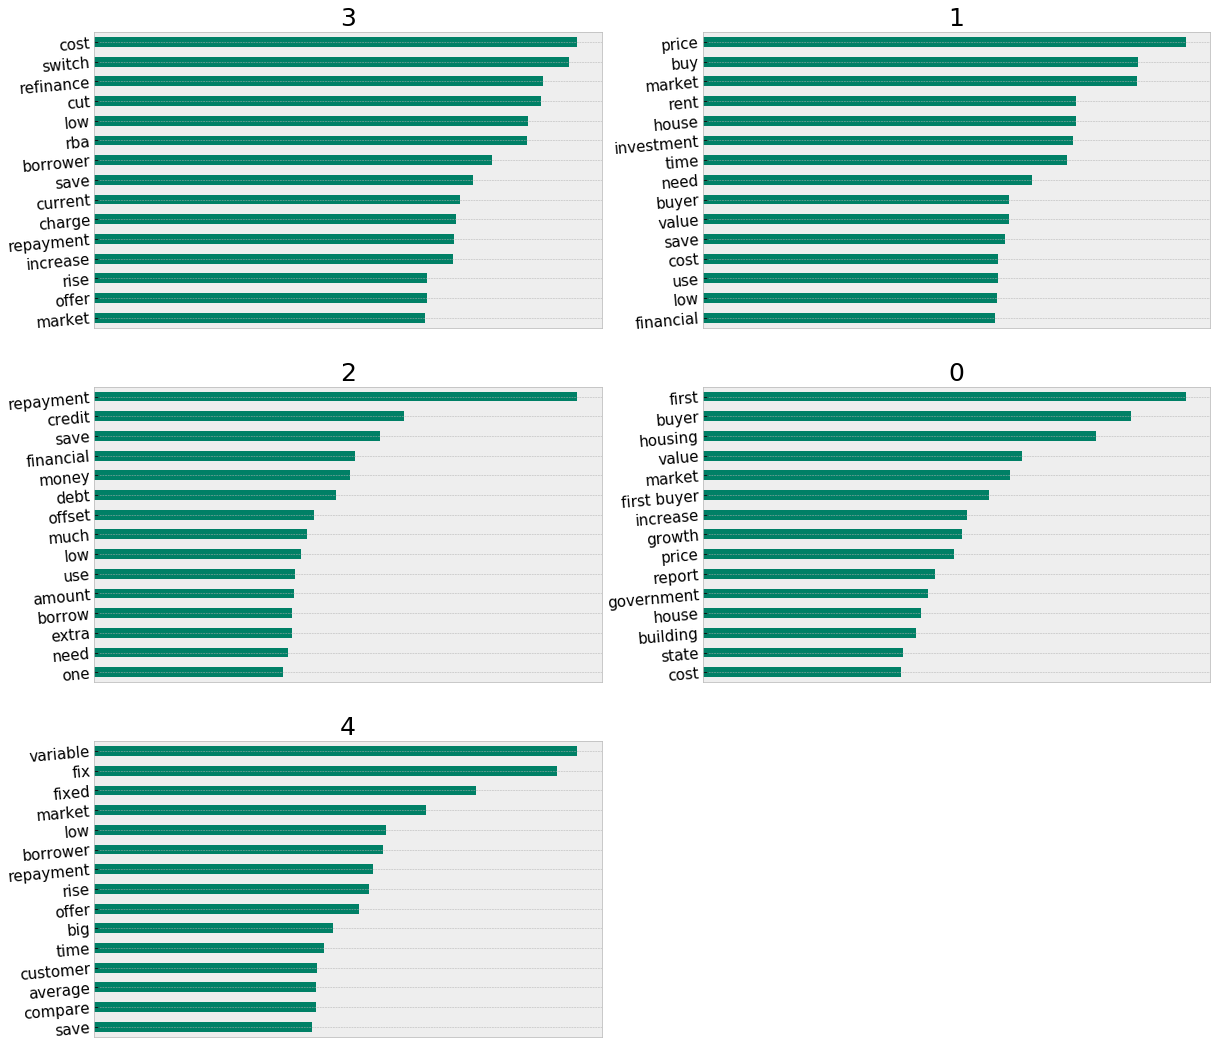

In [185]:
i=0
for y in imp_terms_unigram:
    i=i+1
    plt.subplot(4,2,i)
    imp_terms_unigram.get(y).head(15).sort_values().plot(kind="barh",figsize=(20,25),colormap='summer')
    plt.title(y,fontsize=25)
    plt.xticks([])
    plt.yticks(size=15,rotation=5)

Cluster 0 and 4 have some distinction. The remaining has alot of overlap but there were one or two distinct words. This should do for now


##  pickling the cluster model for home-loans

In [29]:
import pickle

In [30]:
# Dump the trained decision tree classifier with Pickle
pipeline_mod_filename = 'second_level_pipeline.pkl'
# Open the file to save as pkl file
pipeline_mod_pkl = open(pipeline_mod_filename, 'wb')
pickle.dump(loan_cluster,pipeline_mod_pkl)
# Close the pickle instances
pipeline_mod_pkl.close()